In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2022-12-28 22:32:59 +05:30)


### Importing The Required Python Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

time: 5.88 s (started: 2022-12-28 22:32:59 +05:30)


In [3]:
from joblib import dump, load

time: 0 ns (started: 2022-12-28 22:33:05 +05:30)


#### Reading the Original Dataset

In [4]:
df=pd.read_csv('owid-co2-data.csv')
df.shape

(25989, 60)

time: 172 ms (started: 2022-12-28 22:33:05 +05:30)


In [5]:
y=df['co2']
df=df.drop('co2',axis=1)

df['co2']=y

time: 32 ms (started: 2022-12-28 22:33:05 +05:30)


#### Data Cleaning using dropping rows with NA values

In [6]:
df=df.drop('iso_code', axis=1)

time: 31 ms (started: 2022-12-28 22:33:05 +05:30)


In [7]:
data=df.dropna()
print(data.shape)

(1128, 59)
time: 16 ms (started: 2022-12-28 22:33:05 +05:30)


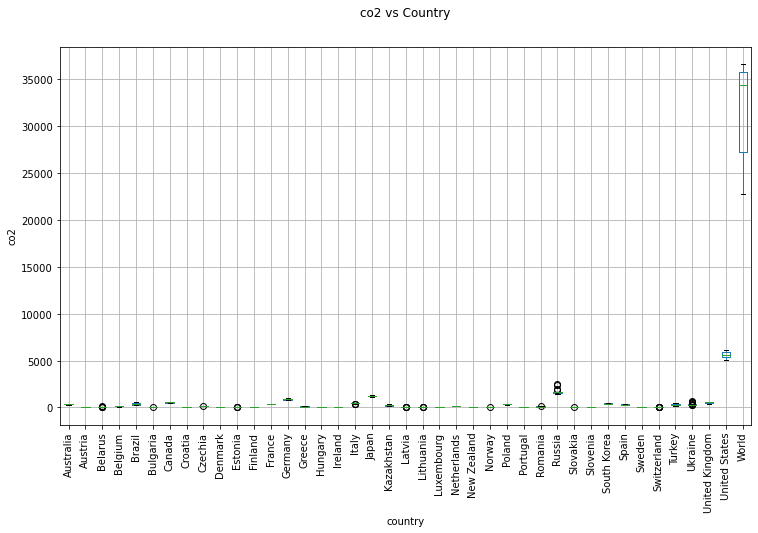

time: 1 s (started: 2022-12-28 22:33:05 +05:30)


In [8]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
data.boxplot("co2", "country", ax=ax)
plt.suptitle('co2 vs Country')
plt.title('')
plt.ylabel('co2')
plt.xticks(rotation=90)
plt.show()

#### Data Cleaning using selecting 20 years data and fill using median

In [9]:
data1=df.copy()

data1 = data1.loc[df['year'].isin([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])]

time: 16 ms (started: 2022-12-28 22:33:06 +05:30)


In [10]:
print(data1.shape)
value_counts = data1['country'].value_counts()

# Select the rows where the count of occurrences of the value in the 'Category' column is less than 20
data1 = data1[data1['country'].isin(value_counts[value_counts == 20].index)]
print(data1.shape)

(4951, 59)
(4920, 59)
time: 16 ms (started: 2022-12-28 22:33:06 +05:30)


In [11]:
data1.fillna(df.median(numeric_only=True), inplace=True)

data1.to_csv('median_fillna.csv', index = False)

time: 313 ms (started: 2022-12-28 22:33:06 +05:30)


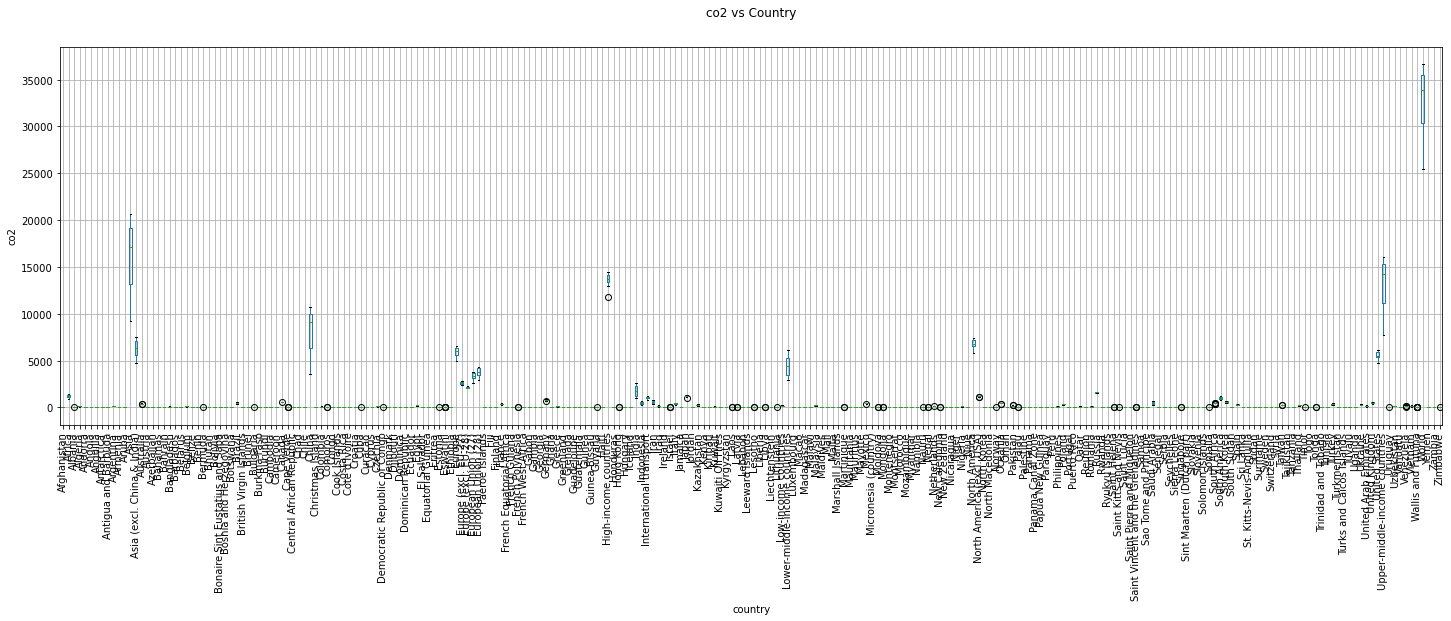

time: 5.45 s (started: 2022-12-28 22:33:07 +05:30)


In [12]:
fig, ax = plt.subplots(1,1, figsize = (24,7))
data1.boxplot("co2", "country", ax=ax)
plt.suptitle('co2 vs Country')
plt.title('')
plt.ylabel('co2')
plt.xticks(rotation=90)
plt.show()

#### Label encoding the country feature

In [13]:
from sklearn.preprocessing import LabelEncoder
count=LabelEncoder()
data['country']= count.fit_transform(data['country'])
data['country'].unique()

data.to_csv('row_cleaned.csv', index = False)

time: 781 ms (started: 2022-12-28 22:33:12 +05:30)


C:\Users\kinsh\AppData\Local\Temp\ipykernel_33732\332896655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country']= count.fit_transform(data['country'])


In [14]:
count=LabelEncoder()
data1['country']= count.fit_transform(data1['country'])
data1['country'].unique()


data1.to_csv('median_fillna.csv', index = False)


time: 266 ms (started: 2022-12-28 22:33:13 +05:30)


#### normalizing the median fillna data set

In [15]:
data_min_max = data1.copy()

# apply normalization techniques
for column in data_min_max.iloc[:, :]:
    data_min_max[column] = (data_min_max[column] - data_min_max[column].min()) / (data_min_max[column].max() - data_min_max[column].min())


data_min_max.to_csv('min-max-normalized.csv')

time: 781 ms (started: 2022-12-28 22:33:13 +05:30)


#### Correlation Matrix

In [16]:
corrM = data_min_max.corr()
corrM.to_csv('correlation.csv', index = False)

time: 78 ms (started: 2022-12-28 22:33:14 +05:30)


<AxesSubplot:>

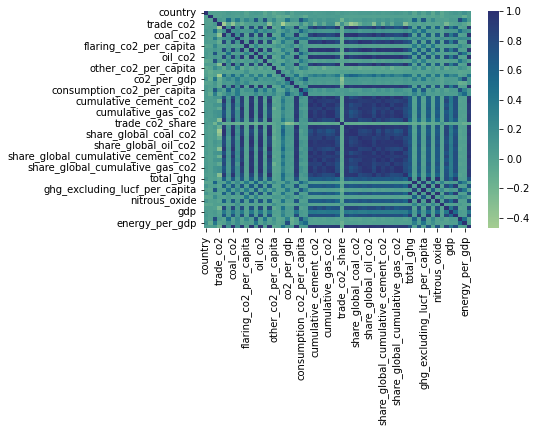

time: 625 ms (started: 2022-12-28 22:33:14 +05:30)


In [17]:
sns.heatmap(corrM, cmap='crest')

### PCA to reduce dimensionality

[3.44281816e-01 1.77626687e-01 1.61445269e-01 1.09493820e-01
 2.88527835e-02 2.45142255e-02 2.24956600e-02 2.06582283e-02
 1.55974283e-02 1.47761045e-02 1.41817729e-02 1.08047760e-02
 8.13104681e-03 7.24009510e-03 5.95301086e-03 5.37928531e-03
 4.60591004e-03 2.90691175e-03 2.78550548e-03 2.47659492e-03
 2.15364211e-03 2.00243371e-03 1.83979488e-03 1.67277431e-03
 1.21423204e-03 1.19669237e-03 1.06994593e-03 1.01801292e-03
 7.59341496e-04 6.14640999e-04 4.72724637e-04 4.52647532e-04
 2.87073001e-04 2.40573350e-04 2.29612096e-04 1.79286397e-04
 1.09147308e-04 5.38095684e-05 5.29769354e-05 3.39113983e-05
 2.57233406e-05 2.44185609e-05 2.08868327e-05 1.65356120e-05
 1.49960016e-05 9.77318067e-06 8.74612441e-06 6.28128656e-06
 4.02783278e-06 2.34830311e-06 1.96761389e-06 1.56417944e-06
 1.24074490e-06 6.28826902e-07 3.72770849e-07 2.70590721e-07
 1.32624723e-08 5.97118876e-10]
0.9999999999999999


<AxesSubplot:>

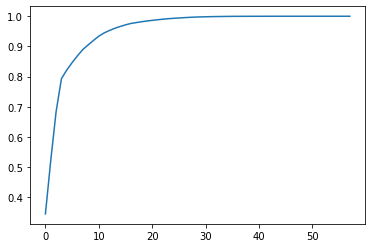

time: 672 ms (started: 2022-12-28 22:33:15 +05:30)


In [18]:
from sklearn.decomposition import PCA
  
pca = PCA()

X = pca.fit_transform(data_min_max.iloc[:,:-1])

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(sum(explained_variance))
xt=np.cumsum(explained_variance)

sns.lineplot(data=xt)

In [19]:
pca = PCA(n_components=0.98)

X = pca.fit_transform(data_min_max.iloc[:,:-1])


explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))
print(X.shape)

0.9817303364269897
(4920, 19)
time: 31 ms (started: 2022-12-28 22:33:15 +05:30)


Storing PCA in memory

In [20]:
dump(pca , 'PCA.joblib')

['PCA.joblib']

time: 16 ms (started: 2022-12-28 22:33:15 +05:30)


#### Spliting the data set for training and testing

In [21]:
from sklearn.model_selection import train_test_split
z=X
y=data_min_max['co2']
#X_train = input data for traing set
#X_test = input data for testing set
#y_train = output for traing set
#y_test = output for test set
X_train, X_test, Y_train, Y_test = train_test_split(z, y, test_size=0.3)

time: 15 ms (started: 2022-12-28 22:33:15 +05:30)


#### Linear Regression

In [22]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

time: 94 ms (started: 2022-12-28 22:33:15 +05:30)


In [23]:
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
predicted_value=regr.predict(X_test)

time: 16 ms (started: 2022-12-28 22:33:15 +05:30)


In [24]:
print(predicted_value)

[0.01091441 0.00873217 0.00124137 ... 0.00884403 0.00143423 0.0004409 ]
time: 0 ns (started: 2022-12-28 22:33:15 +05:30)


Saving the Trained Model to the Memory

In [25]:
dump(regr , 'LinearRegression.joblib')

['LinearRegression.joblib']

time: 16 ms (started: 2022-12-28 22:33:15 +05:30)


Calculating MSE

In [26]:
from sklearn.metrics import mean_squared_error

time: 0 ns (started: 2022-12-28 22:33:16 +05:30)


In [27]:
lr_mse = mean_squared_error(Y_test, predicted_value)

time: 16 ms (started: 2022-12-28 22:33:16 +05:30)


In [28]:
linr_test=regr.score(X_test,Y_test)

time: 0 ns (started: 2022-12-28 22:33:16 +05:30)


In [29]:
linr_train=regr.score(X_train,Y_train)

time: 16 ms (started: 2022-12-28 22:33:16 +05:30)


#### K-nn Regression

In [30]:
from sklearn import neighbors
from math import sqrt

time: 47 ms (started: 2022-12-28 22:33:16 +05:30)


In [31]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

time: 16 ms (started: 2022-12-28 22:33:16 +05:30)


In [32]:
dump(model , 'KnnRegression.joblib')

['KnnRegression.joblib']

time: 15 ms (started: 2022-12-28 22:33:16 +05:30)


In [33]:
pred=model.predict(X_test)

time: 110 ms (started: 2022-12-28 22:33:16 +05:30)


In [34]:
knn_train=model.score(X_train, Y_train)
knn_test=model.score(X_test,Y_test)

time: 406 ms (started: 2022-12-28 22:33:16 +05:30)


In [35]:
knn_mse = mean_squared_error(Y_test, pred)

time: 0 ns (started: 2022-12-28 22:33:16 +05:30)


In [36]:
mse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(Y_test,pred) #calculate rmse
    mse_val.append(error) #store rmse values

    print('MSE value for k= ' , K , 'is:', error)
    print('train Accuracy:',model.score(X_train, Y_train))
    print('test Accuracy:',model.score(X_test, Y_test))
    print('-------------------------------')

MSE value for k=  1 is: 8.242100993161118e-06
train Accuracy: 1.0
test Accuracy: 0.9984060960455281
-------------------------------
MSE value for k=  2 is: 1.0976109044722954e-05
train Accuracy: 0.9996441446988202
test Accuracy: 0.9978773781556893
-------------------------------
MSE value for k=  3 is: 1.7777582593401347e-05
train Accuracy: 0.9994771090598334
test Accuracy: 0.9965620708578935
-------------------------------
MSE value for k=  4 is: 2.452235049218229e-05
train Accuracy: 0.9990436104812045
test Accuracy: 0.99525772961835
-------------------------------
MSE value for k=  5 is: 3.2335782527598826e-05
train Accuracy: 0.9985494634322755
test Accuracy: 0.9937467240835257
-------------------------------
MSE value for k=  6 is: 4.103914544731405e-05
train Accuracy: 0.997812253042842
test Accuracy: 0.9920636186973567
-------------------------------
MSE value for k=  7 is: 5.3359020343613196e-05
train Accuracy: 0.9969993762476282
test Accuracy: 0.9896811318372583
-----------------

#### Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor

time: 94 ms (started: 2022-12-28 22:33:22 +05:30)


In [38]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

time: 172 ms (started: 2022-12-28 22:33:22 +05:30)


In [39]:
dump(regressor , 'DTRegression.joblib')

['DTRegression.joblib']

time: 15 ms (started: 2022-12-28 22:33:22 +05:30)


In [40]:
y_pred = regressor.predict(X_test)
tree_train=regressor.score(X_train,Y_train)
tree_test=regressor.score(X_test,Y_test)

dt_mse = mean_squared_error(Y_test, y_pred)

time: 16 ms (started: 2022-12-28 22:33:22 +05:30)


#### Ridge Regression

In [41]:
from sklearn.linear_model import Ridge

time: 0 ns (started: 2022-12-28 22:33:22 +05:30)


In [42]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train)

Ridge()

time: 31 ms (started: 2022-12-28 22:33:22 +05:30)


In [43]:
dump(clf , 'RidgeRegression.joblib')

['RidgeRegression.joblib']

time: 0 ns (started: 2022-12-28 22:33:22 +05:30)


In [44]:
r_pred = clf.predict(X_test)
ridge_train=clf.score(X_train,Y_train)
ridge_test=clf.score(X_test,Y_test)

r_mse = mean_squared_error(Y_test, r_pred)

time: 0 ns (started: 2022-12-28 22:33:22 +05:30)


#### Summarry Matrix

In [45]:
graph=[["Regressor", "R^2 of train","R^2 of test","MSE"],
       ["linear Regression", linr_train , linr_test,lr_mse],
       ["k-NN Regression",knn_train,knn_test,knn_mse],
       ["Tree Regression",tree_train,tree_test,dt_mse],
       ["Ridge Regression", ridge_train, ridge_test,r_mse]]
graph = pd.DataFrame(graph)
print(graph)

                   0             1            2         3
0          Regressor  R^2 of train  R^2 of test       MSE
1  linear Regression      0.994264     0.992062  0.000041
2    k-NN Regression      0.999477     0.996562  0.000018
3    Tree Regression           1.0     0.997297  0.000014
4   Ridge Regression      0.994247     0.992048  0.000041
time: 0 ns (started: 2022-12-28 22:33:22 +05:30)
